In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# importing libaries for our work 

In [30]:
datatrain=pd.read_csv("train.csv")
datatrain.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

# loading data set train &test  and reading first two rows

In [31]:
print(datatrain.shape) # getting shape of train dataset

(1460, 81)


In [32]:
#datatest=pd.read_csv("test.csv") #loading test  dataset and displaying 2 rows
#datatest.head(2)

In [33]:
#print(datatest.shape)# getting shape of test data set

In [34]:
datatrain.info() #getting info of  train data sets , basically types of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
datatrain.describe() #getting more knowlede on int varible features

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [36]:
datatrain.describe(include="object") # getting knowledge of object features 

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [37]:
datatrain.isnull().values.any() # is any null value present

True

In [38]:
print(datatrain.columns) #names of columns in datasets present

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

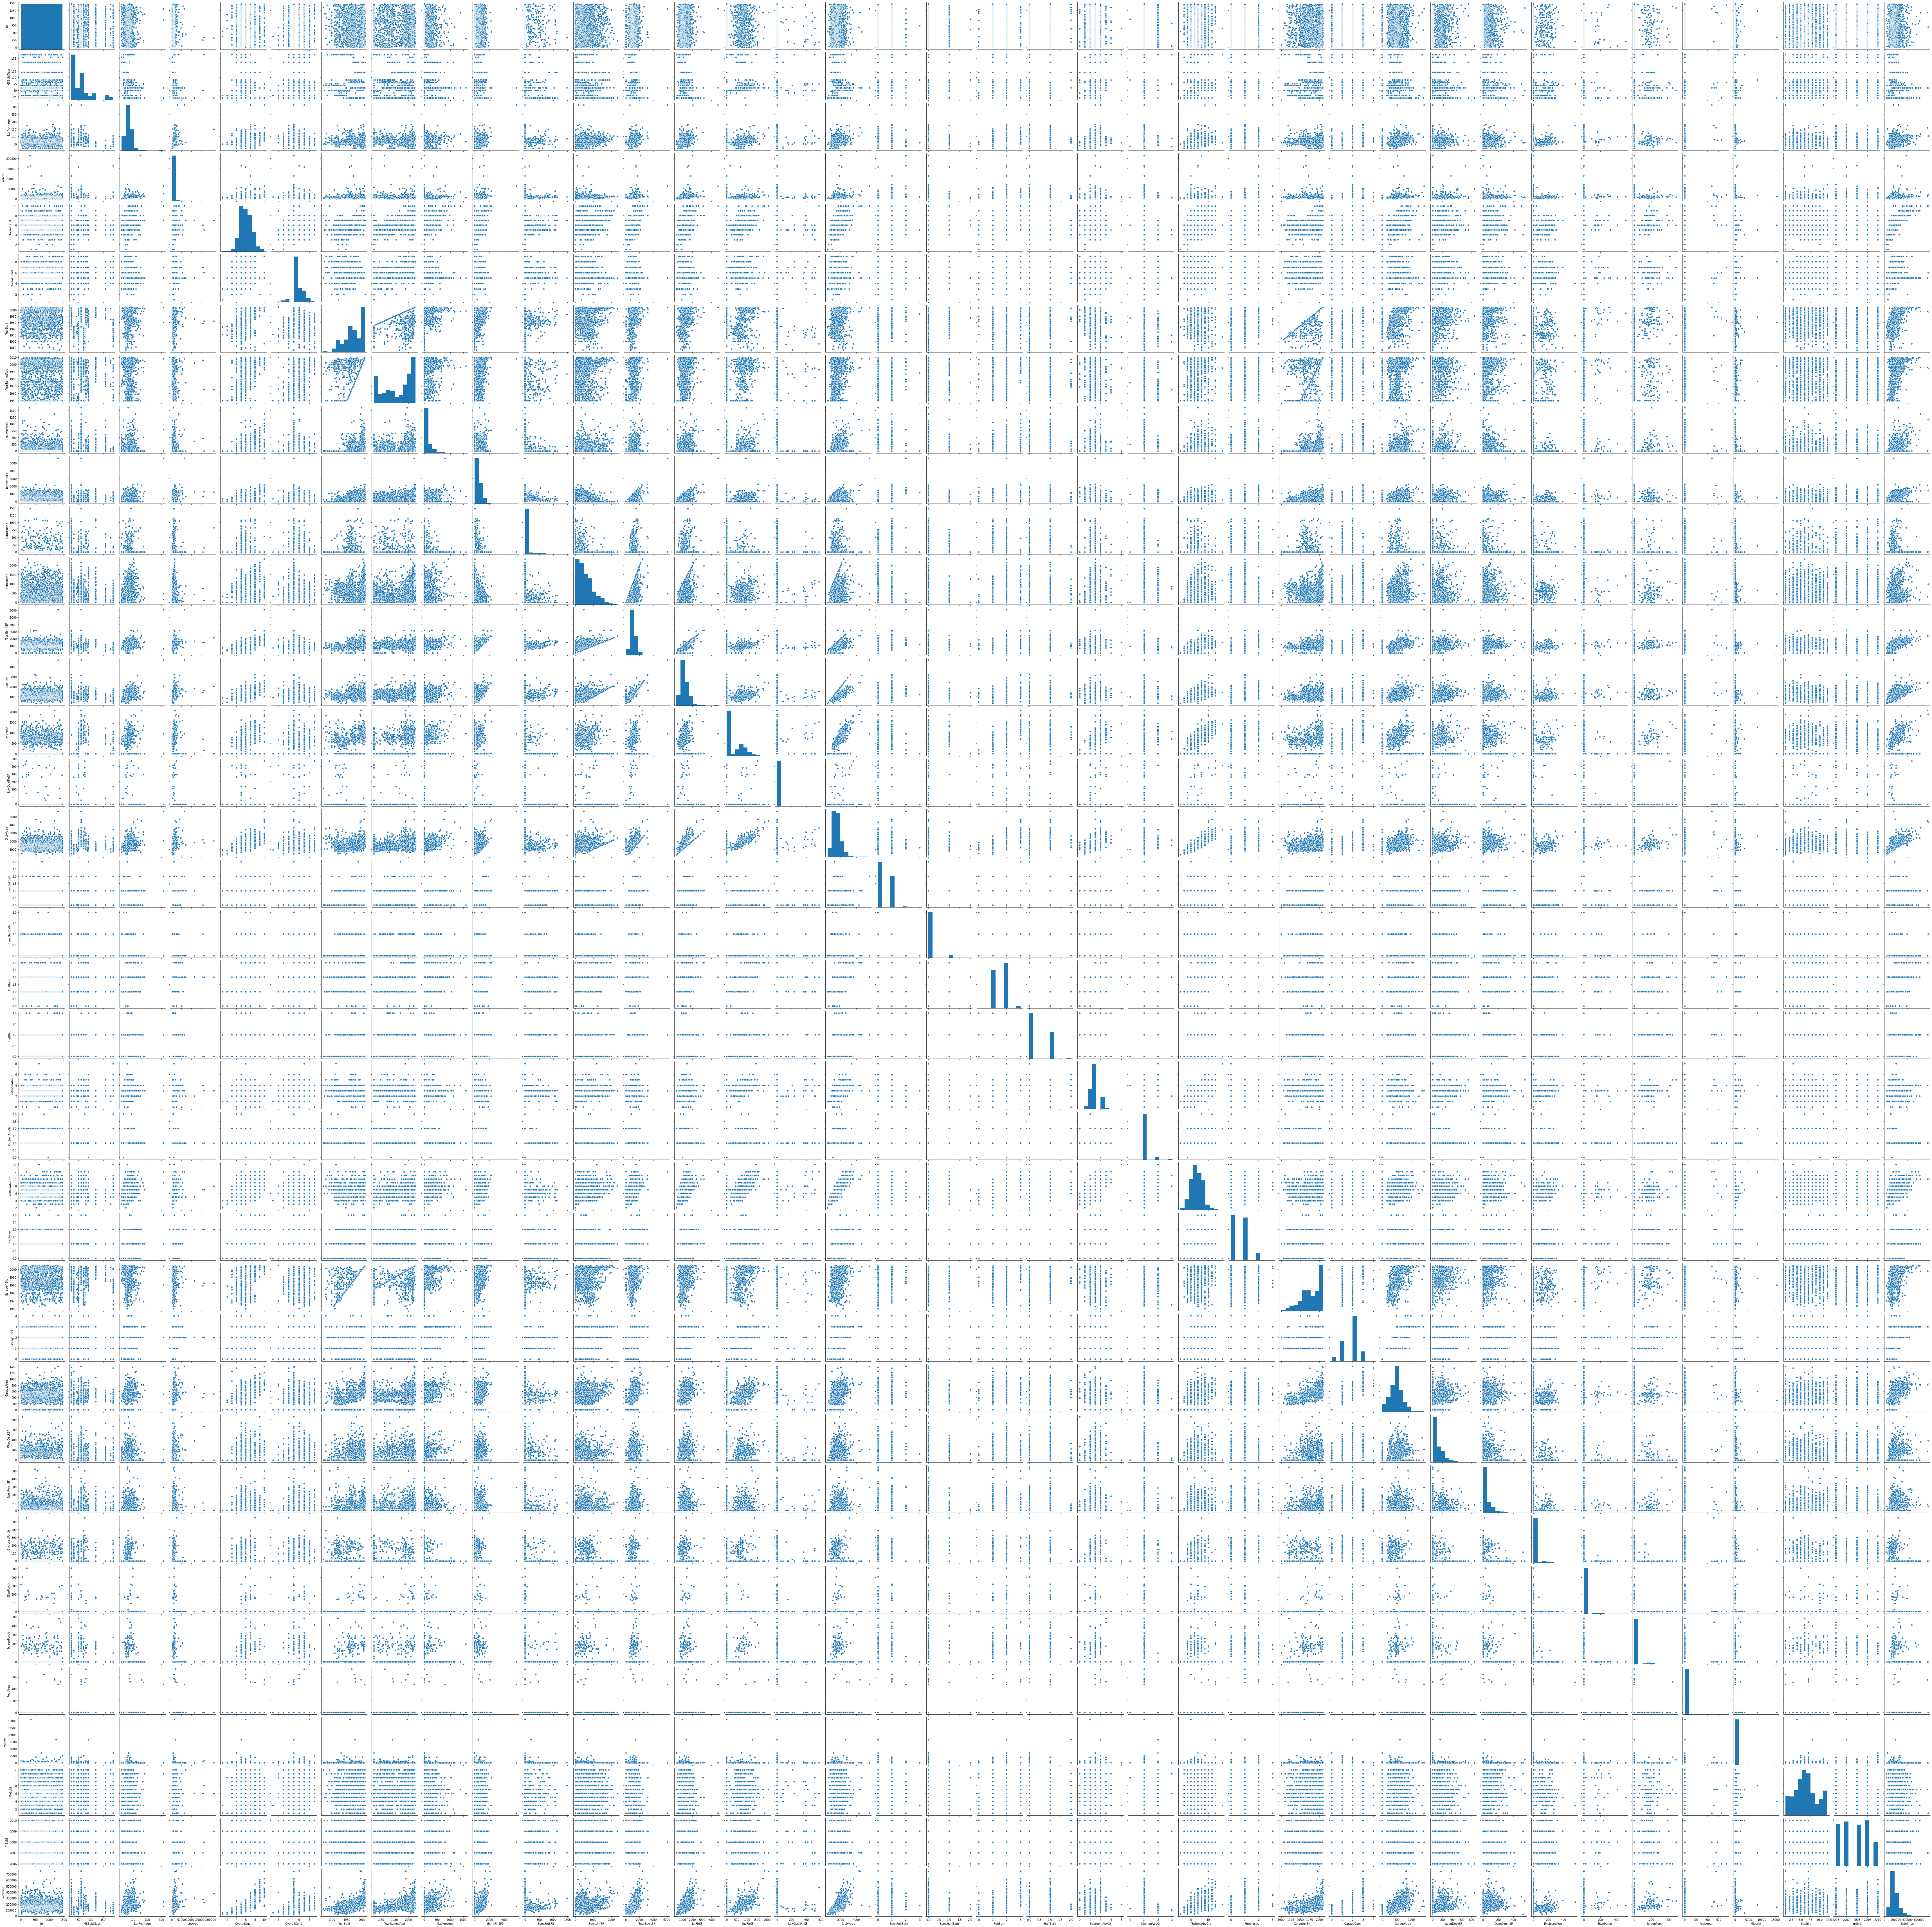

In [39]:
sns.pairplot(data=datatrain) #ploting pair plot to understand features and seeing the realtions btw the features

# we have measurable and unmeasurable data both 

# numeric/ Quntitative data , which is discrete and coninious 

# numeric features storing all those feature from datatrain sets which are int orflaot in nature

In [ ]:
nfeatures=[feature for feature in datatrain.columns if datatrain[feature].dtypes !="O"] # running loop in nanvalue percent and storing only int or float value features
len(nfeatures) #numerical features 
#datatest[nfeatures].columns
print(datatrain[nfeatures].shape)
datatrain[nfeatures].head() 

# discrete values which cant be precise ,i.e exact value 

# discrete features value which cant be further precise¶
storing all the discrete value in dfeatures which have leng less than 25 including ID feature

In [41]:
yfeatures=[feature for feature in nfeatures if "Yr" in feature or "Year" in feature ]
print(yfeatures)
dfeatures=[feature for feature in nfeatures if len(datatrain[feature].unique())<25 and feature not in yfeatures+["Id"]]
print(dfeatures)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [42]:
datatrain[dfeatures].head(2)

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5

# features in dfeatures and grouping median of saleprice, then ploting all features one by one

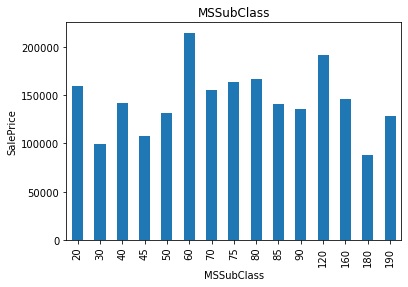

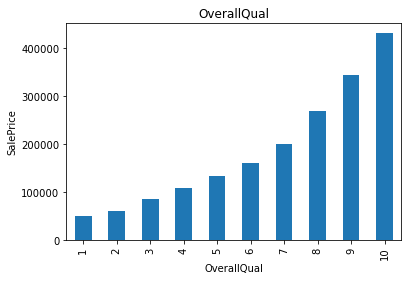

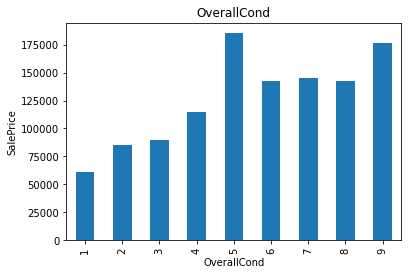

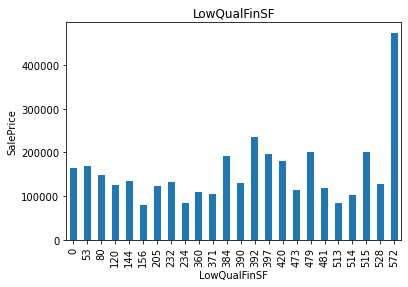

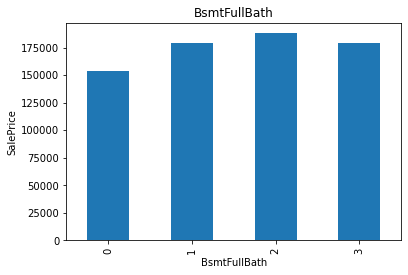

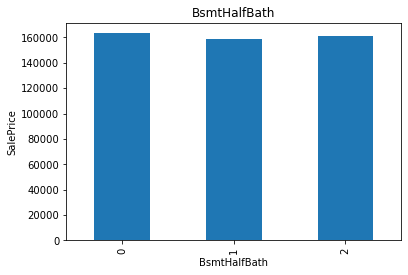

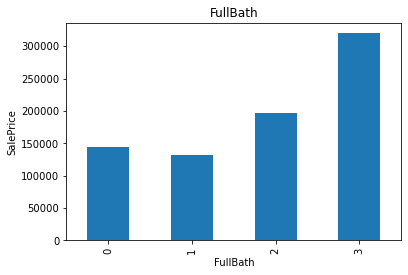

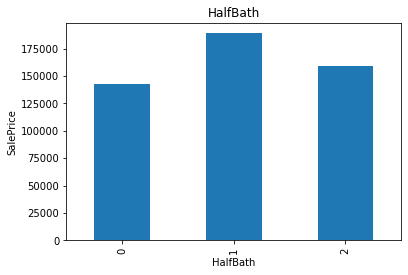

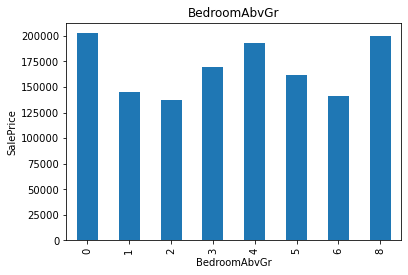

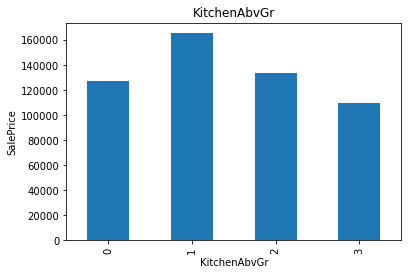

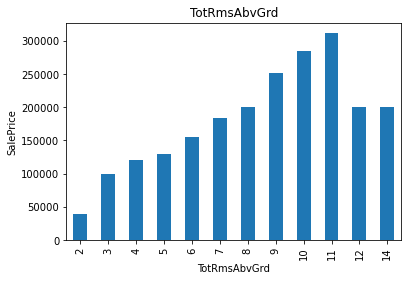

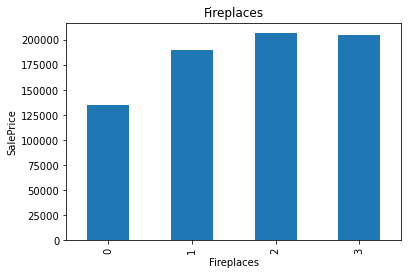

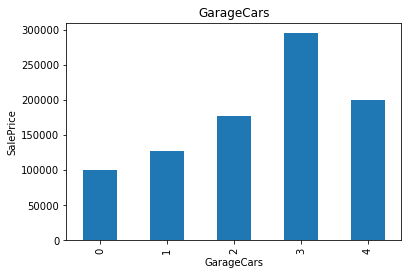

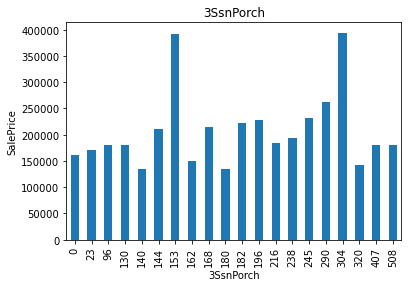

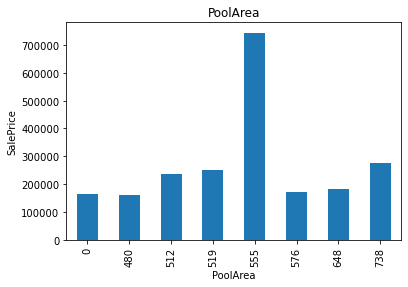

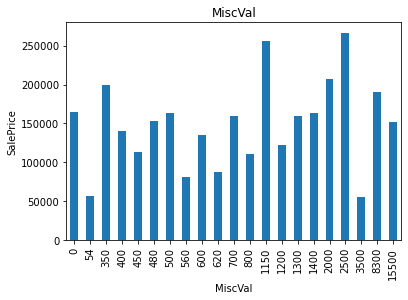

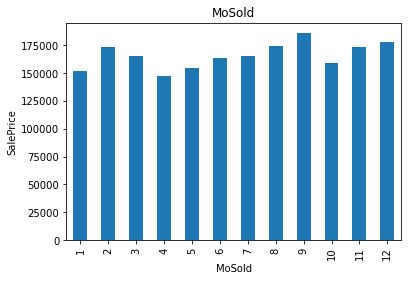

In [43]:
for feature in dfeatures:
    data=datatrain.copy()
    
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

# continious values , which can be precise furhter i.e accurate value

# continious features value which can be precise¶
storing all continious value in cfeature excluding dfeatures and ID

In [44]:
cfeatures=[feature for feature in nfeatures if feature not in dfeatures +yfeatures+["Id"]]
print(cfeatures)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [45]:
data[cfeatures].head(2)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500

# features in cfeatures , creating histo of saleprice , faetures one by one

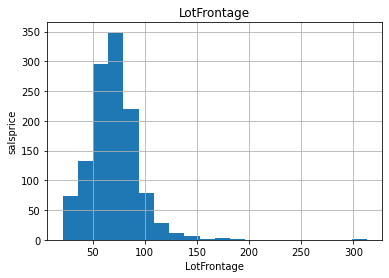

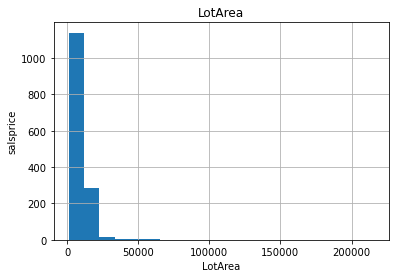

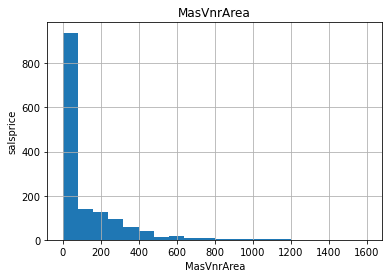

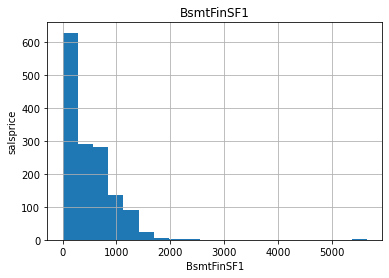

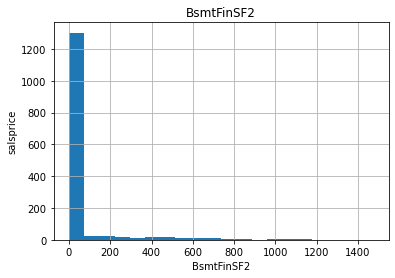

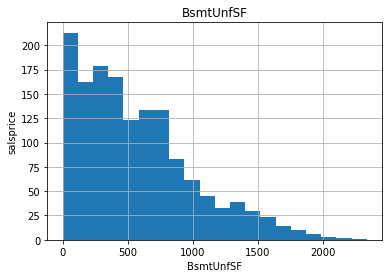

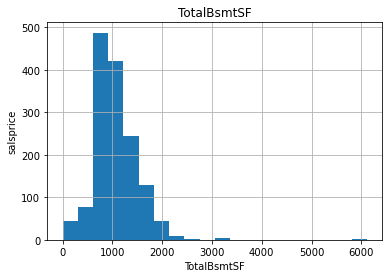

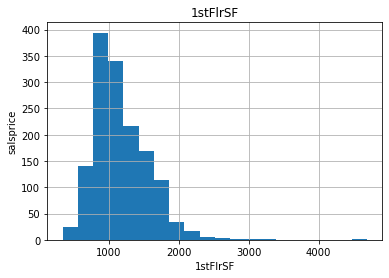

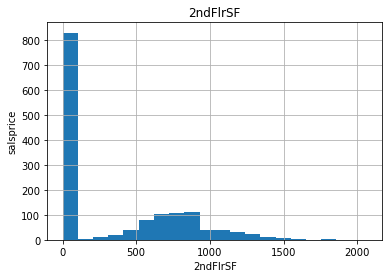

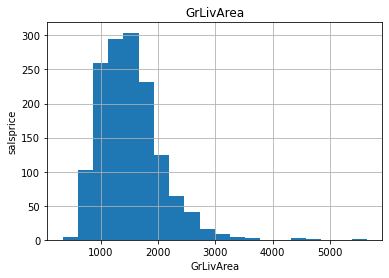

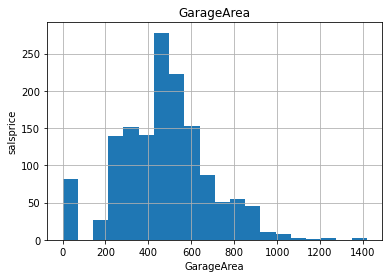

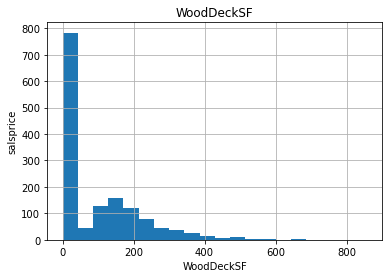

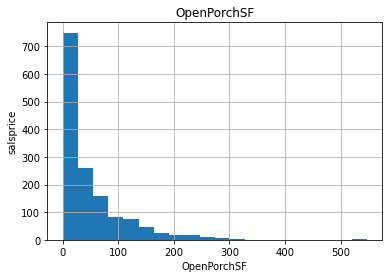

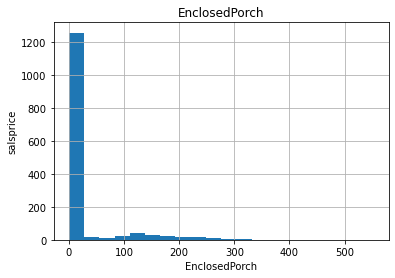

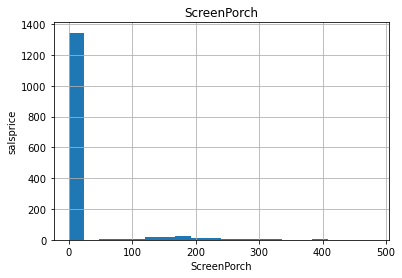

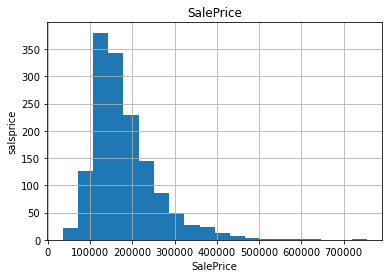

In [46]:
for feature in cfeatures:
    data=datatrain.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("salsprice")
    plt.title(feature)
    plt.show()

# object/categorical/qualtitative data, which are in object or in categories in nature

# object featutres storing all those feature from datatrain sets which are object in nature

In [47]:
ofeatures=[feature for feature in datatrain.columns if datatrain[feature].dtypes=="O"] #ruuning loop anbd storing object features 
len(ofeatures)
#atatest[ofeatures].columns
print(datatrain[ofeatures].shape)
data[ofeatures].head()

(1460, 43)


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [48]:
for feature in ofeatures:
    print("fetaure=={} and number of catergories =={}".format(feature, len(datatrain[feature].unique())))

fetaure==MSZoning and number of catergories ==5
fetaure==Street and number of catergories ==2
fetaure==Alley and number of catergories ==3
fetaure==LotShape and number of catergories ==4
fetaure==LandContour and number of catergories ==4
fetaure==Utilities and number of catergories ==2
fetaure==LotConfig and number of catergories ==5
fetaure==LandSlope and number of catergories ==3
fetaure==Neighborhood and number of catergories ==25
fetaure==Condition1 and number of catergories ==9
fetaure==Condition2 and number of catergories ==8
fetaure==BldgType and number of catergories ==5
fetaure==HouseStyle and number of catergories ==8
fetaure==RoofStyle and number of catergories ==6
fetaure==RoofMatl and number of catergories ==8
fetaure==Exterior1st and number of catergories ==15
fetaure==Exterior2nd and number of catergories ==16
fetaure==MasVnrType and number of catergories ==5
fetaure==ExterQual and number of catergories ==4
fetaure==ExterCond and number of catergories ==5
fetaure==Founda

In [49]:
for feature in ofeatures:
    print("fetaure=={} and number of catergories =={}".format(feature, datatrain[feature].unique()))

fetaure==MSZoning and number of catergories ==['RL' 'RM' 'C (all)' 'FV' 'RH']
fetaure==Street and number of catergories ==['Pave' 'Grvl']
fetaure==Alley and number of catergories ==[nan 'Grvl' 'Pave']
fetaure==LotShape and number of catergories ==['Reg' 'IR1' 'IR2' 'IR3']
fetaure==LandContour and number of catergories ==['Lvl' 'Bnk' 'Low' 'HLS']
fetaure==Utilities and number of catergories ==['AllPub' 'NoSeWa']
fetaure==LotConfig and number of catergories ==['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
fetaure==LandSlope and number of catergories ==['Gtl' 'Mod' 'Sev']
fetaure==Neighborhood and number of catergories ==['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
fetaure==Condition1 and number of catergories ==['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
fetaure==Conditio

# year features creating yfeatures and storing only data value which have any year related meaning

In [50]:
yfeatures=[feature for feature in nfeatures if "Yr" in feature or "Year" in feature ]
print(yfeatures)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [51]:
for feature in yfeatures: # checking unique values in year features
    print(feature,datatrain[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

# grouping the saleprice at particular year at which it is sold by median and ploting a graph

Text(0.5, 1.0, 'house price at year which sold')

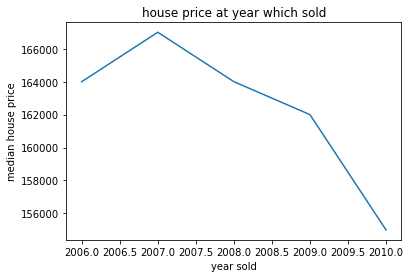

In [52]:
datatrain.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("year sold")
plt.ylabel("median house price")
plt.title("house price at year which sold")

In [53]:
for feature in yfeatures:
    if feature!="YrSold":
        data=datatrain.copy()
        data[feature]=data["YrSold"].data[feature]

AttributeError: 'Series' object has no attribute 'data'

# ---------------------------------------------------

# using logarothimc transformation in countinious feature

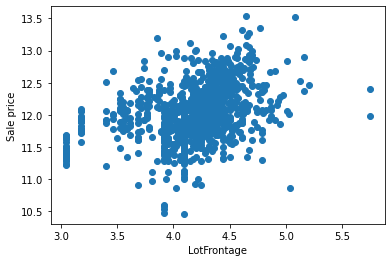

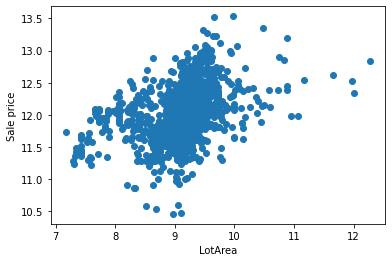

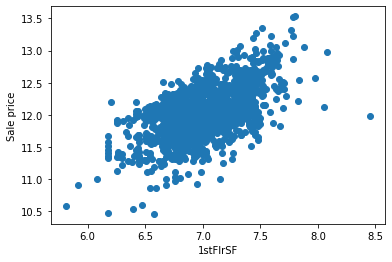

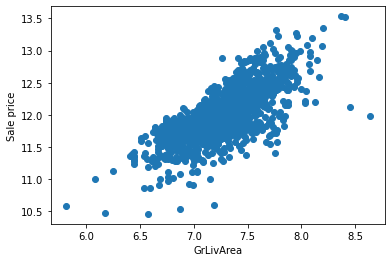

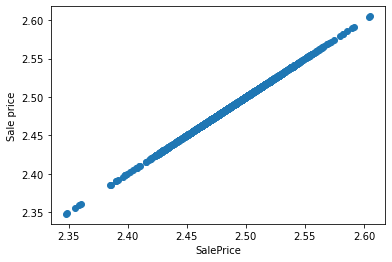

In [54]:
for feature in cfeatures:
    data=datatrain.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data["SalePrice"]=np.log(data["SalePrice"])
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("Sale price")
        plt.show()

# checking outlier in continious data

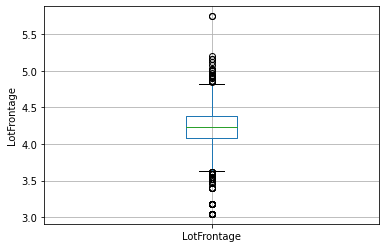

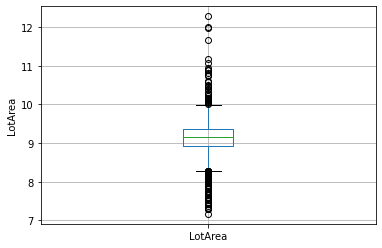

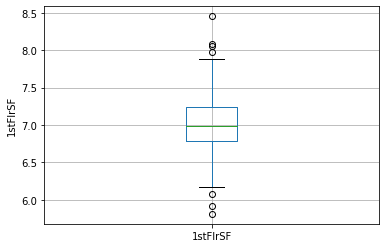

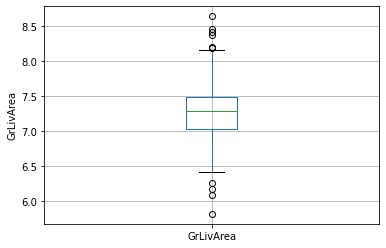

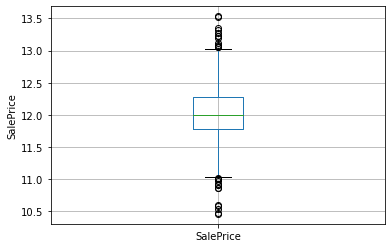

In [55]:
for feature in cfeatures:
    data=datatrain.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(feature)
        plt.ylabel(feature)
        plt.show()

# ---------------------------------------------------

# checking and counting then converting into percentage of  nan value in features of datatrain set and storing in nanvaluepercent variable

In [56]:
nanvaluepercent=[features for features in datatrain.columns if datatrain[features].isnull().sum()>1 ] # running loop to store
print("feature -->missing %")
print("\n")
for feature in nanvaluepercent: #running loop for displaying nan value percentage
    print(feature+"-->",np.round(datatrain[feature].isnull().mean(),6))



feature -->missing %


LotFrontage--> 0.177397
Alley--> 0.937671
MasVnrType--> 0.005479
MasVnrArea--> 0.005479
BsmtQual--> 0.025342
BsmtCond--> 0.025342
BsmtExposure--> 0.026027
BsmtFinType1--> 0.025342
BsmtFinType2--> 0.026027
FireplaceQu--> 0.472603
GarageType--> 0.055479
GarageYrBlt--> 0.055479
GarageFinish--> 0.055479
GarageQual--> 0.055479
GarageCond--> 0.055479
PoolQC--> 0.995205
Fence--> 0.807534
MiscFeature--> 0.963014


# for feature in nanvaluepercent variable mapping the NAN with 1 , then grouping the nan or zero value with feature and ploting the bar graph to see is their any realtion with ,missing value with sales price

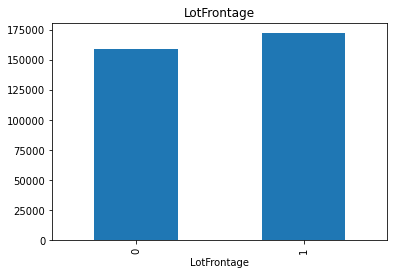

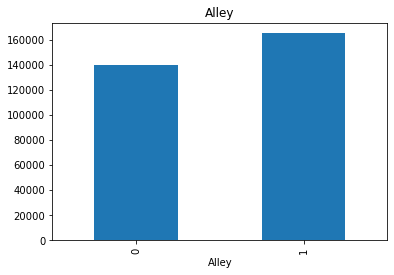

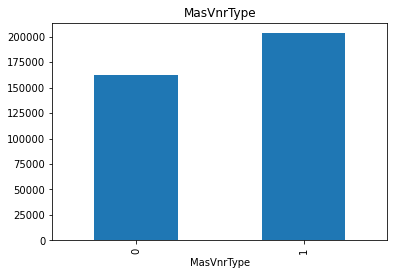

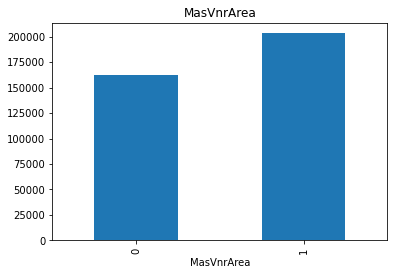

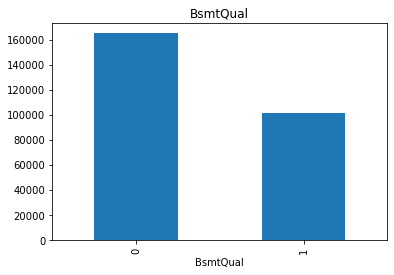

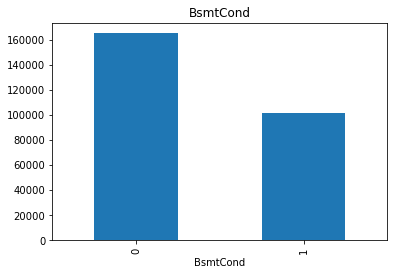

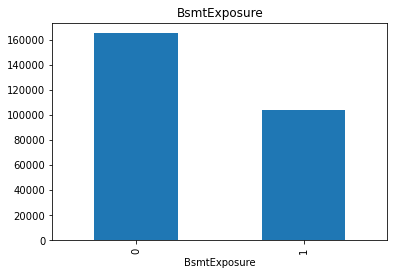

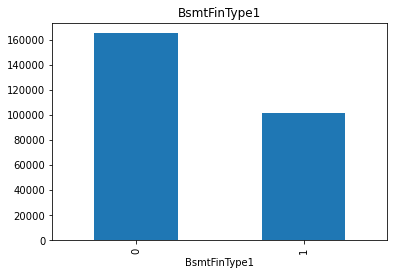

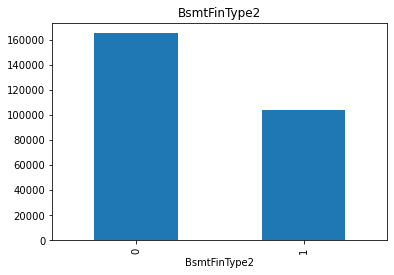

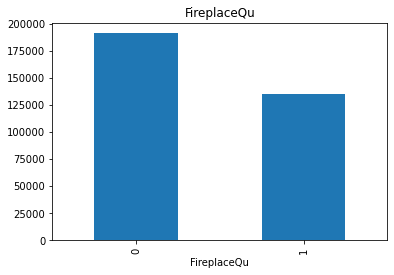

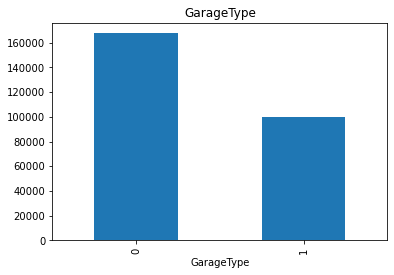

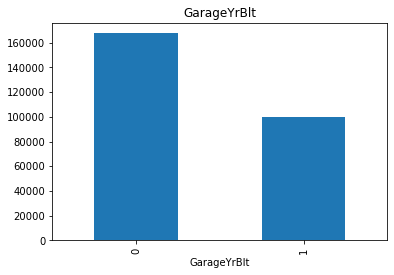

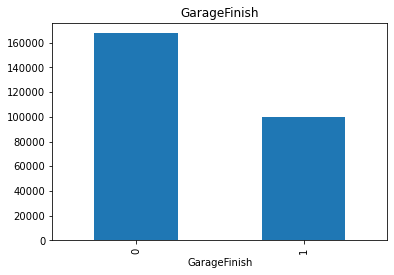

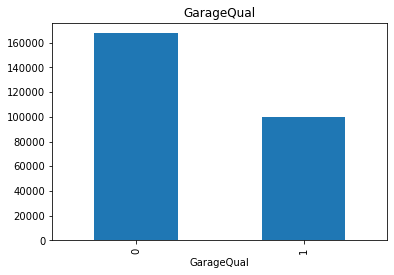

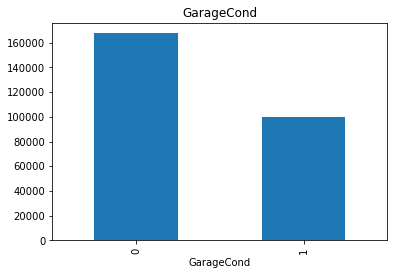

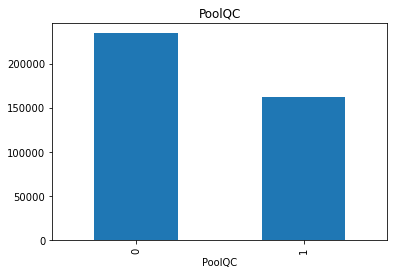

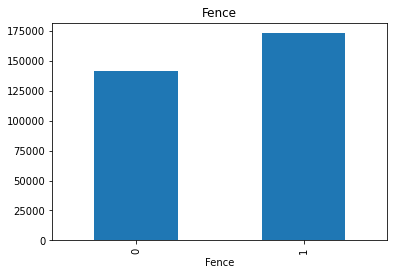

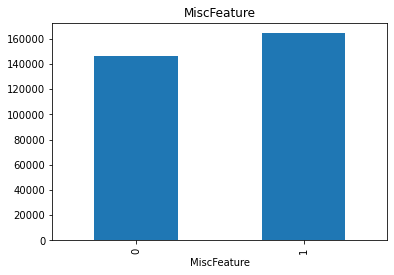

In [57]:
for feature in nanvaluepercent:# running loop in nanvalueperent
    data=datatrain.copy() # copying data train in data 
    data[feature]=np.where(data[feature].isnull(),1,0) # mapping with o and 1
    data.groupby(feature)["SalePrice"].median().plot.bar() # grouping and ploting the nan features
    plt.title(feature)
    plt.show()


In [58]:
data["Id"].shape # no of cuistomer in data train means ID 

(1460,)

# feature engineering begins 

# getting all nan values in one varible , replaceing with 0

In [59]:
def zero(datatrain,nanvaluepercent): # creating function filling zero where nan or missing is present
    data=datatrain.copy()
    data[nanvaluepercent]=data[nanvaluepercent].fillna("0") 
    return data 

datatrain=zero(datatrain,nanvaluepercent) #calling function with data set and nan value list
datatrain[nanvaluepercent].isnull().sum() # checking nan value again

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [60]:
datatrain.head(8) # nan getting replaced

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave     0      Reg   
1   2          20       RL          80     9600   Pave     0      Reg   
2   3          60       RL          68    11250   Pave     0      IR1   
3   4          70       RL          60     9550   Pave     0      IR1   
4   5          60       RL          84    14260   Pave     0      IR1   
5   6          50       RL          85    14115   Pave     0      IR1   
6   7          20       RL          75    10084   Pave     0      Reg   
7   8          60       RL           0    10382   Pave     0      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0      0      0           0       0   
1         Lvl    AllPub  ...        0      0      0           0       0   
2         Lvl    AllPub  ...        0      0      0           0       0   
3         Lvl    AllPub  ...        0      0      0           0       0   
4         Lvl    AllPub  ...        0      0      0           0       0   
5         Lvl    AllPub  ...        0      0  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0      0      0           0       0   
7         Lvl    AllPub  ...        0      0      0        Shed     350   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  

[8 rows x 81 columns]

In [61]:
ofeatures #list of object features
#print(len(ofeatures))    

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# working with object features which have nan values , grouping with slaesprice divided by len of data, if something rare is presnent it will be get replaced by 0

In [64]:
for feature in ofeatures:
    values1=datatrain.groupby(feature)["SalePrice"].count()/len(datatrain) #grouping features with salesprice and counting then diuiding with nos of record
    values_1=values1[values1>0.01].index #storing only those value is greater than 0.01
    datatrain[feature]=np.where(datatrain[feature].isin(values_1),datatrain[feature],"0") #inserting calculated value where we have missing and putting zero where we have no value

In [65]:
datatrain.head(100)

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0     1          60       RL          65     8450   Pave     0      Reg   
1     2          20       RL          80     9600   Pave     0      Reg   
2     3          60       RL          68    11250   Pave     0      IR1   
3     4          70       RL          60     9550   Pave     0      IR1   
4     5          60       RL          84    14260   Pave     0      IR1   
..  ...         ...      ...         ...      ...    ...   ...      ...   
95   96          60       RL           0     9765   Pave     0      IR2   
96   97          20       RL          78    10264   Pave     0      IR1   
97   98          20       RL          73    10921   Pave     0      Reg   
98   99          30       RL          85    10625   Pave     0      Reg   
99  100          20       RL          77     9320   Pave     0      IR1   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0      0     0           0       0   
1          Lvl    AllPub  ...        0      0     0           0       0   
2          Lvl    AllPub  ...        0      0     0           0       0   
3          Lvl    AllPub  ...        0      0     0           0       0   
4          Lvl    AllPub  ...        0      0     0           0       0   
..         ...       ...  ...      ...    ...   ...         ...     ...   
95         Lvl    AllPub  ...        0      0     0        Shed     480   
96         Lvl    AllPub  ...        0      0     0           0       0   
97         HLS    AllPub  ...        0      0     0           0       0   
98         Lvl    AllPub  ...        0      0     0        Shed     400   
99         Lvl    AllPub  ...        0      0     0        Shed     400   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       2   2008        WD         Normal     208500  
1       5   2007        WD         Normal     181500  
2       9   2008        WD         Normal     223500  
3       2   2006        WD        Abnorml     140000  
4      12   2008        WD         Normal     250000  
..    ...    ...       ...            ...        ...  
95      4   2009        WD         Normal     185000  
96      8   2006        WD         Normal     214000  
97      5   2007        WD         Normal      94750  
98      5   2010       COD        Abnorml      83000  
99      1   2010        WD         Normal     128950  

[100 rows x 81 columns]

# grouping salesprice , taking average of all , then sorting 

In [66]:
for feature in ofeatures:
    labels=datatrain.groupby([feature])["SalePrice"].mean().sort_values().index #grouping feature with sales proice and takling the mean for distributrion
    labels={k:i for i,k in enumerate(labels,0)} #labbeling mean value
    datatrain[feature]=datatrain[feature].map(labels)

In [67]:
 datatrain.head(10)

Id  MSSubClass  MSZoning LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3          65     8450       1      2         0   
1   2          20         3          80     9600       1      2         0   
2   3          60         3          68    11250       1      2         1   
3   4          70         3          60     9550       1      2         1   
4   5          60         3          84    14260       1      2         1   
5   6          50         3          85    14115       1      2         1   
6   7          20         3          75    10084       1      2         0   
7   8          60         3           0    10382       1      2         1   
8   9          50         1          51     6120       1      2         0   
9  10         190         3          50     7420       1      2         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            1          1  ...         0       0      3            1        0   
1            1          1  ...         0       0      3            1        0   
2            1          1  ...         0       0      3            1        0   
3            1          1  ...         0       0      3            1        0   
4            1          1  ...         0       0      3            1        0   
5            1          1  ...         0       0      1            0      700   
6            1          1  ...         0       0      3            1        0   
7            1          1  ...         0       0      3            0      350   
8            1          1  ...         0       0      3            1        0   
9            1          1  ...         0       0      3            1        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008         2              3     208500  
1       5    2007         2              3     181500  
2       9    2008         2              3     223500  
3       2    2006         2              0     140000  
4      12    2008         2              3     250000  
5      10    2009         2              3     143000  
6       8    2007         2              3     307000  
7      11    2009         2              3     200000  
8       4    2008         2              0     129900  
9       1    2008         2              3     118000  

[10 rows x 81 columns]

# all values get replaced , now we have scale down the features in 0-1
# collecting all values apart from id and sales price

In [70]:
#collecting values apart from id and sales price 
scaling=[feature for feature in datatrain.columns if feature not in ["Id","SalePerice"] ] 
print(len(scaling))

80


In [71]:
datatrain.head(10)

Id  MSSubClass  MSZoning LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3          65     8450       1      2         0   
1   2          20         3          80     9600       1      2         0   
2   3          60         3          68    11250       1      2         1   
3   4          70         3          60     9550       1      2         1   
4   5          60         3          84    14260       1      2         1   
5   6          50         3          85    14115       1      2         1   
6   7          20         3          75    10084       1      2         0   
7   8          60         3           0    10382       1      2         1   
8   9          50         1          51     6120       1      2         0   
9  10         190         3          50     7420       1      2         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            1          1  ...         0       0      3            1        0   
1            1          1  ...         0       0      3            1        0   
2            1          1  ...         0       0      3            1        0   
3            1          1  ...         0       0      3            1        0   
4            1          1  ...         0       0      3            1        0   
5            1          1  ...         0       0      1            0      700   
6            1          1  ...         0       0      3            1        0   
7            1          1  ...         0       0      3            0      350   
8            1          1  ...         0       0      3            1        0   
9            1          1  ...         0       0      3            1        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008         2              3     208500  
1       5    2007         2              3     181500  
2       9    2008         2              3     223500  
3       2    2006         2              0     140000  
4      12    2008         2              3     250000  
5      10    2009         2              3     143000  
6       8    2007         2              3     307000  
7      11    2009         2              3     200000  
8       4    2008         2              0     129900  
9       1    2008         2              3     118000  

[10 rows x 81 columns]

# no nan is present

In [72]:
datatrain.isnull().values.any()

False

# normalizing apart from id and sales price
# min max scaler

In [73]:
#running loop for dcaling i.e normalization (0--------------1) range
feature=[feature for feature in datatrain.columns if feature not in ["Id","SalePrice"]]
scaler=MinMaxScaler()
scaler.fit(datatrain[feature]) #fitting data

MinMaxScaler(copy=True, feature_range=(0, 1))

In [74]:
scaler.transform(datatrain[feature]) #transorming data

array([[0.23529412, 0.75      , 0.20766773, ..., 0.5       , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.25559105, ..., 0.25      , 0.66666667,
        0.75      ],
       [0.23529412, 0.75      , 0.2172524 , ..., 0.5       , 0.66666667,
        0.75      ],
       ...,
       [0.29411765, 0.75      , 0.21086262, ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.2172524 , ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.23961661, ..., 0.5       , 0.66666667,
        0.75      ]])

# after scaling adding id and sales price column to dataframe

In [78]:
 #addeing id and sales price column to normalize data
finaldata=pd.concat([datatrain[["Id", "SalePrice"]].reset_index(drop=True),
                         pd.DataFrame(scaler.transform(datatrain[feature]),
                        columns=feature)],axis=1)


In [79]:
finaldata.head() # final data set 

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1     208500    0.235294      0.75     0.207668  0.033420     1.0    1.0   
1   2     181500    0.000000      0.75     0.255591  0.038795     1.0    1.0   
2   3     223500    0.235294      0.75     0.217252  0.046507     1.0    1.0   
3   4     140000    0.294118      0.75     0.191693  0.038561     1.0    1.0   
4   5     250000    0.235294      0.75     0.268371  0.060576     1.0    1.0   

   LotShape  LandContour  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0  0.000000     0.333333  ...          0.0       0.0     0.0    1.0   
1  0.000000     0.333333  ...          0.0       0.0     0.0    1.0   
2  0.333333     0.333333  ...          0.0       0.0     0.0    1.0   
3  0.333333     0.333333  ...          0.0       0.0     0.0    1.0   
4  0.333333     0.333333  ...          0.0       0.0     0.0    1.0   

   MiscFeature  MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0          1.0      0.0  0.090909    0.50  0.666667           0.75  
1          1.0      0.0  0.363636    0.25  0.666667           0.75  
2          1.0      0.0  0.727273    0.50  0.666667           0.75  
3          1.0      0.0  0.090909    0.00  0.666667           0.00  
4          1.0      0.0  1.000000    0.50  0.666667           0.75  

[5 rows x 81 columns]

# saving data to new data (finaldatatrain.csv)

In [80]:
finaldata.to_csv('finaltraindata.csv',index=False) # final train (all preprocessing have done in train data)

# feature engineering for test data.
# from starting numeric->discrete->continious
# object 
# date 
# replacing nan 
# scaling down 0---1
# saving to new dataframe (finaltestdata.csv)

In [81]:
datatest=pd.read_csv("test.csv") # loading test data for pre processing

In [82]:
datatest.head(10) #test data no sales column

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  
5       0      4    2010        WD         Normal  
6     500      3    2010        WD         Normal  
7       0      5    2010        WD         Normal  
8       0      2    2010        WD         Normal  
9       0      4    2010        WD         Normal  

[10 rows x 80 columns]

In [83]:
datatest.isnull().values.sum() # lots of nan value

7000

In [84]:
#nan value percent in testdata
nanvaluepercenttest=[features for features in datatest.columns if datatest[features].isnull().sum()>1 ] 
print("feature -->missing %")
print("\n")
for feature in nanvaluepercenttest: 
    print(feature+"-->",np.round(datatest[feature].isnull().mean(),6))


feature -->missing %


MSZoning--> 0.002742
LotFrontage--> 0.155586
Alley--> 0.926662
Utilities--> 0.001371
MasVnrType--> 0.010966
MasVnrArea--> 0.010281
BsmtQual--> 0.030158
BsmtCond--> 0.030843
BsmtExposure--> 0.030158
BsmtFinType1--> 0.028787
BsmtFinType2--> 0.028787
BsmtFullBath--> 0.001371
BsmtHalfBath--> 0.001371
Functional--> 0.001371
FireplaceQu--> 0.500343
GarageType--> 0.05209
GarageYrBlt--> 0.053461
GarageFinish--> 0.053461
GarageQual--> 0.053461
GarageCond--> 0.053461
PoolQC--> 0.997944
Fence--> 0.801234
MiscFeature--> 0.965045


In [85]:
#creating function that will be put zero where we have nan values 
def zero(datatest,nanvaluepercenttest):
    data=datatest.copy()
    data[nanvaluepercenttest]=data[nanvaluepercenttest].fillna("0")
    return data 

datatest=zero(datatest,nanvaluepercenttest) #calling function 
datatest[nanvaluepercenttest].isnull().sum() #checking nan value

MSZoning        0
LotFrontage     0
Alley           0
Utilities       0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtFullBath    0
BsmtHalfBath    0
Functional      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [86]:
datatest.head(10)

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH          80    11622   Pave     0      Reg   
1  1462          20       RL          81    14267   Pave     0      IR1   
2  1463          60       RL          74    13830   Pave     0      IR1   
3  1464          60       RL          78     9978   Pave     0      IR1   
4  1465         120       RL          43     5005   Pave     0      IR1   
5  1466          60       RL          75    10000   Pave     0      IR1   
6  1467          20       RL           0     7980   Pave     0      IR1   
7  1468          60       RL          63     8402   Pave     0      IR1   
8  1469          20       RL          85    10176   Pave     0      Reg   
9  1470          20       RL          70     8400   Pave     0      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0      0  MnPrv           0   
1         Lvl    AllPub  ...           0        0      0      0        Gar2   
2         Lvl    AllPub  ...           0        0      0  MnPrv           0   
3         Lvl    AllPub  ...           0        0      0      0           0   
4         HLS    AllPub  ...         144        0      0      0           0   
5         Lvl    AllPub  ...           0        0      0      0           0   
6         Lvl    AllPub  ...           0        0      0  GdPrv        Shed   
7         Lvl    AllPub  ...           0        0      0      0           0   
8         Lvl    AllPub  ...           0        0      0      0           0   
9         Lvl    AllPub  ...           0        0      0  MnPrv           0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  
5       0      4    2010        WD         Normal  
6     500      3    2010        WD         Normal  
7       0      5    2010        WD         Normal  
8       0      2    2010        WD         Normal  
9       0      4    2010        WD         Normal  

[10 rows x 80 columns]

In [87]:
salesprice=pd.read_csv("sample_submission.csv")#loading sales price column which is in differnt file
salesprice.head(5)

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [88]:
testnew= pd.concat([datatest,salesprice], axis=1) #adding both dataframes (by concat we got two id column i.e duplicate)

In [89]:
testnew.head(10)

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH          80    11622   Pave     0      Reg   
1  1462          20       RL          81    14267   Pave     0      IR1   
2  1463          60       RL          74    13830   Pave     0      IR1   
3  1464          60       RL          78     9978   Pave     0      IR1   
4  1465         120       RL          43     5005   Pave     0      IR1   
5  1466          60       RL          75    10000   Pave     0      IR1   
6  1467          20       RL           0     7980   Pave     0      IR1   
7  1468          60       RL          63     8402   Pave     0      IR1   
8  1469          20       RL          85    10176   Pave     0      Reg   
9  1470          20       RL          70     8400   Pave     0      Reg   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...      0  MnPrv           0       0      6   2010   
1         Lvl    AllPub  ...      0      0        Gar2   12500      6   2010   
2         Lvl    AllPub  ...      0  MnPrv           0       0      3   2010   
3         Lvl    AllPub  ...      0      0           0       0      6   2010   
4         HLS    AllPub  ...      0      0           0       0      1   2010   
5         Lvl    AllPub  ...      0      0           0       0      4   2010   
6         Lvl    AllPub  ...      0  GdPrv        Shed     500      3   2010   
7         Lvl    AllPub  ...      0      0           0       0      5   2010   
8         Lvl    AllPub  ...      0      0           0       0      2   2010   
9         Lvl    AllPub  ...      0  MnPrv           0       0      4   2010   

  SaleType  SaleCondition    Id      SalePrice  
0       WD         Normal  1461  169277.052498  
1       WD         Normal  1462  187758.393989  
2       WD         Normal  1463  183583.683570  
3       WD         Normal  1464  179317.477511  
4       WD         Normal  1465  150730.079977  
5       WD         Normal  1466  177150.989247  
6       WD         Normal  1467  172070.659229  
7       WD         Normal  1468  175110.956520  
8       WD         Normal  1469  162011.698832  
9       WD         Normal  1470  160726.247831  

[10 rows x 82 columns]

In [90]:
hello=testnew.loc[:,~testnew.columns.duplicated()] #removing duplicate Id column

In [91]:
hello.head(2)

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH          80    11622   Pave     0      Reg   
1  1462          20       RL          81    14267   Pave     0      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0      0  MnPrv           0       0   
1         Lvl    AllPub  ...        0      0      0        Gar2   12500   

  MoSold YrSold  SaleType  SaleCondition      SalePrice  
0      6   2010        WD         Normal  169277.052498  
1      6   2010        WD         Normal  187758.393989  

[2 rows x 81 columns]

In [92]:
ntfeatures=[feature for feature in hello.columns if hello[feature].dtypes !="O"] # running loop in nanvalue percent and storing only int or float value features
len(ntfeatures) #numerical features 
#datatest[nfeatures].columns
print(hello[ntfeatures].shape)
hello[ntfeatures].head() 

(1459, 33)


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1461          20    11622            5            6       1961   
1  1462          20    14267            6            6       1958   
2  1463          60    13830            5            5       1997   
3  1464          60     9978            6            6       1998   
4  1465         120     5005            8            5       1992   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0          1961       468.0       144.0      270.0  ...         140   
1          1958       923.0         0.0      406.0  ...         393   
2          1998       791.0         0.0      137.0  ...         212   
3          1998       602.0         0.0      324.0  ...         360   
4          1992       263.0         0.0     1017.0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0          0          120         0        0   
1           36              0          0            0         0    12500   
2           34              0          0            0         0        0   
3           36              0          0            0         0        0   
4           82              0          0          144         0        0   

   MoSold  YrSold      SalePrice  
0       6    2010  169277.052498  
1       6    2010  187758.393989  
2       3    2010  183583.683570  
3       6    2010  179317.477511  
4       1    2010  150730.079977  

[5 rows x 33 columns]

In [93]:
ytfeatures=[feature for feature in ntfeatures if "Yr" in feature or "Year" in feature ]
print(ytfeatures)
dtfeatures=[feature for feature in nfeatures if len(hello[feature].unique())<25 and feature not in ytfeatures+["Id"]]
print(dtfeatures)

['YearBuilt', 'YearRemodAdd', 'YrSold']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']


In [94]:
ctfeatures=[feature for feature in nfeatures if feature not in dtfeatures +yfeatures+["Id"]]
print(ctfeatures)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


In [95]:
otfeatures=[feature for feature in hello.columns if hello[feature].dtypes=="O"] #ruuning loop anbd storing object features 
len(otfeatures)
#atatest[ofeatures].columns
print(hello[otfeatures].shape)
data[otfeatures].head()

(1459, 48)


MSZoning  LotFrontage Street Alley LotShape LandContour Utilities LotConfig  \
0       RL         65.0   Pave   NaN      Reg         Lvl    AllPub    Inside   
1       RL         80.0   Pave   NaN      Reg         Lvl    AllPub       FR2   
2       RL         68.0   Pave   NaN      IR1         Lvl    AllPub    Inside   
3       RL         60.0   Pave   NaN      IR1         Lvl    AllPub    Corner   
4       RL         84.0   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageYrBlt GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr  ...      2003.0          RFn         TA         TA   
1       Gtl      Veenker  ...      1976.0          RFn         TA         TA   
2       Gtl      CollgCr  ...      2001.0          RFn         TA         TA   
3       Gtl      Crawfor  ...      1998.0          Unf         TA         TA   
4       Gtl      NoRidge  ...      2000.0          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType  SaleCondition  
0          Y    NaN   NaN           1       WD         Normal  
1          Y    NaN   NaN           1       WD         Normal  
2          Y    NaN   NaN           1       WD         Normal  
3          Y    NaN   NaN           1       WD        Abnorml  
4          Y    NaN   NaN           1       WD         Normal  

[5 rows x 48 columns]

In [96]:
for feature in otfeatures:
    print("fetaure=={} and number of catergories =={}".format(feature, len(hello[feature].unique())))

fetaure==MSZoning and number of catergories ==6
fetaure==LotFrontage and number of catergories ==116
fetaure==Street and number of catergories ==2
fetaure==Alley and number of catergories ==3
fetaure==LotShape and number of catergories ==4
fetaure==LandContour and number of catergories ==4
fetaure==Utilities and number of catergories ==2
fetaure==LotConfig and number of catergories ==5
fetaure==LandSlope and number of catergories ==3
fetaure==Neighborhood and number of catergories ==25
fetaure==Condition1 and number of catergories ==9
fetaure==Condition2 and number of catergories ==5
fetaure==BldgType and number of catergories ==5
fetaure==HouseStyle and number of catergories ==7
fetaure==RoofStyle and number of catergories ==6
fetaure==RoofMatl and number of catergories ==4
fetaure==Exterior1st and number of catergories ==14
fetaure==Exterior2nd and number of catergories ==16
fetaure==MasVnrType and number of catergories ==5
fetaure==MasVnrArea and number of catergories ==304
fetaure=

In [97]:
ytfeatures=[feature for feature in nfeatures if "Yr" in feature or "Year" in feature ]
print(ytfeatures)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [101]:
for feature in otfeatures:
    value1=hello.groupby(feature)["SalePrice"].count()/len(hello) #grouping features with salesprice and counting then diuiding with nos of record
    value_1=value1[value1>0.1].index
    #storing only those value is greater than 0.01
    hello[feature]=np.where(hello[feature].isin(value_1),hello[feature],"0") #inserting calculated value where we have missing and putting zero where we have no value

C:\Users\Padam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [102]:
for feature in otfeatures:
    labels=hello.groupby([feature])["SalePrice"].mean().sort_values().index #grouping feature with sales proice and takling the mean for distributrion
    labels={k:i for i,k in enumerate(labels,0)} #labbeling mean value
    hello[feature]=hello[feature].map(labels)

C:\Users\Padam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [103]:
hello.head(5)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20         0            0    11622       1      0         0   
1  1462          20         2            0    14267       1      0         1   
2  1463          60         2            0    13830       1      0         1   
3  1464          60         2            0     9978       1      0         1   
4  1465         120         2            0     5005       1      0         1   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            0          0  ...         0       0      0            0        0   
1            0          0  ...         0       0      1            0    12500   
2            0          0  ...         0       0      0            0        0   
3            0          0  ...         0       0      1            0        0   
4            1          0  ...         0       0      1            0        0   

   MoSold  YrSold  SaleType  SaleCondition      SalePrice  
0       6    2010         0              0  169277.052498  
1       6    2010         0              0  187758.393989  
2       3    2010         0              0  183583.683570  
3       6    2010         0              0  179317.477511  
4       1    2010         0              0  150730.079977  

[5 rows x 81 columns]

In [104]:
hello.isnull().values.any()

True

In [105]:
hello.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   int64  
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [106]:
#running loop for dcaling i.e normalization (0--------------1) range
feature=[feature for feature in hello.columns if feature not in ["Id","SalePrice"]]
scaler=MinMaxScaler()
scaler.fit(hello[feature]) #fitting data

MinMaxScaler(copy=True, feature_range=(0, 1))

In [107]:
scaler.transform(hello[feature]) #transorming data

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.38235294, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [108]:
finaltestdata=pd.concat([hello[["Id", "SalePrice"]].reset_index(drop=True),
                         pd.DataFrame(scaler.transform(hello[feature]), columns=feature)],axis=1)

In [109]:
finaltestdata.head(10)

Id      SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0  1461  169277.052498    0.000000       0.0          0.0  0.184147     1.0   
1  1462  187758.393989    0.000000       1.0          0.0  0.232124     1.0   
2  1463  183583.683570    0.235294       1.0          0.0  0.224197     1.0   
3  1464  179317.477511    0.235294       1.0          0.0  0.154326     1.0   
4  1465  150730.079977    0.588235       1.0          0.0  0.064121     1.0   
5  1466  177150.989247    0.235294       1.0          0.0  0.154725     1.0   
6  1467  172070.659229    0.000000       1.0          0.0  0.118085     1.0   
7  1468  175110.956520    0.235294       1.0          0.0  0.125739     1.0   
8  1469  162011.698832    0.000000       1.0          0.0  0.157918     1.0   
9  1470  160726.247831    0.000000       1.0          0.0  0.125703     1.0   

   Alley  LotShape  LandContour  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0    0.0       0.0          0.0  ...     0.208333       0.0     0.0    0.0   
1    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
2    0.0       0.5          0.0  ...     0.000000       0.0     0.0    0.0   
3    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
4    0.0       0.5          1.0  ...     0.250000       0.0     0.0    1.0   
5    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
6    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
7    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
8    0.0       0.0          0.0  ...     0.000000       0.0     0.0    1.0   
9    0.0       0.0          0.0  ...     0.000000       0.0     0.0    0.0   

   MiscFeature   MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0          0.0  0.000000  0.454545     1.0       0.0            0.0  
1          0.0  0.735294  0.454545     1.0       0.0            0.0  
2          0.0  0.000000  0.181818     1.0       0.0            0.0  
3          0.0  0.000000  0.454545     1.0       0.0            0.0  
4          0.0  0.000000  0.000000     1.0       0.0            0.0  
5          0.0  0.000000  0.272727     1.0       0.0            0.0  
6          0.0  0.029412  0.181818     1.0       0.0            0.0  
7          0.0  0.000000  0.363636     1.0       0.0            0.0  
8          0.0  0.000000  0.090909     1.0       0.0            0.0  
9          0.0  0.000000  0.272727     1.0       0.0            0.0  

[10 rows x 81 columns]

In [110]:
finaltestdata.to_csv('finaltestdata.csv',index=False) # final test (all preprocessing have done in train data)

In [111]:
finaltestdata.head(7)

Id      SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0  1461  169277.052498    0.000000       0.0          0.0  0.184147     1.0   
1  1462  187758.393989    0.000000       1.0          0.0  0.232124     1.0   
2  1463  183583.683570    0.235294       1.0          0.0  0.224197     1.0   
3  1464  179317.477511    0.235294       1.0          0.0  0.154326     1.0   
4  1465  150730.079977    0.588235       1.0          0.0  0.064121     1.0   
5  1466  177150.989247    0.235294       1.0          0.0  0.154725     1.0   
6  1467  172070.659229    0.000000       1.0          0.0  0.118085     1.0   

   Alley  LotShape  LandContour  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0    0.0       0.0          0.0  ...     0.208333       0.0     0.0    0.0   
1    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
2    0.0       0.5          0.0  ...     0.000000       0.0     0.0    0.0   
3    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
4    0.0       0.5          1.0  ...     0.250000       0.0     0.0    1.0   
5    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   
6    0.0       0.5          0.0  ...     0.000000       0.0     0.0    1.0   

   MiscFeature   MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0          0.0  0.000000  0.454545     1.0       0.0            0.0  
1          0.0  0.735294  0.454545     1.0       0.0            0.0  
2          0.0  0.000000  0.181818     1.0       0.0            0.0  
3          0.0  0.000000  0.454545     1.0       0.0            0.0  
4          0.0  0.000000  0.000000     1.0       0.0            0.0  
5          0.0  0.000000  0.272727     1.0       0.0            0.0  
6          0.0  0.029412  0.181818     1.0       0.0            0.0  

[7 rows x 81 columns]

In [112]:
finaldata.head(7)

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1     208500    0.235294      0.75     0.207668  0.033420     1.0    1.0   
1   2     181500    0.000000      0.75     0.255591  0.038795     1.0    1.0   
2   3     223500    0.235294      0.75     0.217252  0.046507     1.0    1.0   
3   4     140000    0.294118      0.75     0.191693  0.038561     1.0    1.0   
4   5     250000    0.235294      0.75     0.268371  0.060576     1.0    1.0   
5   6     143000    0.176471      0.75     0.271565  0.059899     1.0    1.0   
6   7     307000    0.000000      0.75     0.239617  0.041057     1.0    1.0   

   LotShape  LandContour  ...  ScreenPorch  PoolArea  PoolQC     Fence  \
0  0.000000     0.333333  ...          0.0       0.0     0.0  1.000000   
1  0.000000     0.333333  ...          0.0       0.0     0.0  1.000000   
2  0.333333     0.333333  ...          0.0       0.0     0.0  1.000000   
3  0.333333     0.333333  ...          0.0       0.0     0.0  1.000000   
4  0.333333     0.333333  ...          0.0       0.0     0.0  1.000000   
5  0.333333     0.333333  ...          0.0       0.0     0.0  0.333333   
6  0.000000     0.333333  ...          0.0       0.0     0.0  1.000000   

   MiscFeature   MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0          1.0  0.000000  0.090909    0.50  0.666667           0.75  
1          1.0  0.000000  0.363636    0.25  0.666667           0.75  
2          1.0  0.000000  0.727273    0.50  0.666667           0.75  
3          1.0  0.000000  0.090909    0.00  0.666667           0.00  
4          1.0  0.000000  1.000000    0.50  0.666667           0.75  
5          0.0  0.045161  0.818182    0.75  0.666667           0.75  
6          1.0  0.000000  0.636364    0.25  0.666667           0.75  

[7 rows x 81 columns]

# test and train i sconvert into number scale(0--1)
# now using lasso (linera regression) for feature selection

In [113]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# pd.pandas.set_option('display.max_columns', None)

In [114]:
data=pd.read_csv("finaltraindata.csv")

In [115]:
data.head(3)

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1     208500    0.235294      0.75     0.207668  0.033420     1.0    1.0   
1   2     181500    0.000000      0.75     0.255591  0.038795     1.0    1.0   
2   3     223500    0.235294      0.75     0.217252  0.046507     1.0    1.0   

   LotShape  LandContour  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0  0.000000     0.333333  ...          0.0       0.0     0.0    1.0   
1  0.000000     0.333333  ...          0.0       0.0     0.0    1.0   
2  0.333333     0.333333  ...          0.0       0.0     0.0    1.0   

   MiscFeature  MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0          1.0      0.0  0.090909    0.50  0.666667           0.75  
1          1.0      0.0  0.363636    0.25  0.666667           0.75  
2          1.0      0.0  0.727273    0.50  0.666667           0.75  

[3 rows x 81 columns]

# seprating label data that is sales price

In [116]:
ytrain=data[['SalePrice']]

# seprating fetures coulmn excepyt from id and sales price

In [117]:
xtrain=data.drop(['Id','SalePrice'],axis=1)

# applying lasso and fitting  

In [118]:
featureselection = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
featureselection.fit(xtrain, ytrain)

C:\Users\Padam\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202014027144.1831, tolerance: 920791133.4609977
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [120]:
featureselection.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True])

In [121]:
selectedfeature = xtrain.columns[(featureselection.get_support())]

# no of feature
# no of feature selected

In [122]:
print('total features: {}'.format((xtrain.shape[1])))
print('selected features: {}'.format(len(selectedfeature)))


total features: 79
selected features: 78


# selected feature

In [123]:
selectedfeature

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# selected feature store in xtrain( updating xtrain)

In [124]:
xtrain=xtrain[selectedfeature]

In [126]:
xtrain.head() # selected new features

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.235294      0.75     0.207668  0.033420     1.0    1.0  0.000000   
1    0.000000      0.75     0.255591  0.038795     1.0    1.0  0.000000   
2    0.235294      0.75     0.217252  0.046507     1.0    1.0  0.333333   
3    0.294118      0.75     0.191693  0.038561     1.0    1.0  0.333333   
4    0.235294      0.75     0.268371  0.060576     1.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  ...  3SsnPorch  ScreenPorch  PoolArea  \
0     0.333333        1.0       0.00  ...        0.0          0.0       0.0   
1     0.333333        1.0       0.25  ...        0.0          0.0       0.0   
2     0.333333        1.0       0.00  ...        0.0          0.0       0.0   
3     0.333333        1.0       0.50  ...        0.0          0.0       0.0   
4     0.333333        1.0       0.25  ...        0.0          0.0       0.0   

   Fence  MiscFeature  MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0    1.0          1.0      0.0  0.090909    0.50  0.666667           0.75  
1    1.0          1.0      0.0  0.363636    0.25  0.666667           0.75  
2    1.0          1.0      0.0  0.727273    0.50  0.666667           0.75  
3    1.0          1.0      0.0  0.090909    0.00  0.666667           0.00  
4    1.0          1.0      0.0  1.000000    0.50  0.666667           0.75  

[5 rows x 78 columns]